<a href="https://colab.research.google.com/github/FlyingHirsch96/NN_Gear_Selection/blob/master/Python/LSTM_for_Gear_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM for Gear Selection
Use this piece of code to use data in Google Drive as training data for the LSTM


In [0]:
from google.colab import drive
drive.mount('/content/drive')
import scipy.io as sio
xTrainLoad = sio.loadmat('/content/drive/My Drive/xPyGearChange.mat')
yTrainLoad = sio.loadmat('/content/drive/My Drive/yPyGearChange.mat')
xTestLoad = sio.loadmat('/content/drive/My Drive/xPyGearChangeTest.mat')
yTestLoad = sio.loadmat('/content/drive/My Drive/yPyGearChangeTest.mat')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Use this piece of code to upload data and use it as training data for the LSTM (training data only)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import scipy.io as sio
xTrainLoad = sio.loadmat('xPyGearChange.mat')
yTrainLoad = sio.loadmat('yPyGearChange.mat')

Saving xPyGearChange.mat to xPyGearChange.mat
Saving yPyGearChange.mat to yPyGearChange.mat
User uploaded file "xPyGearChange.mat" with length 18181224 bytes
User uploaded file "yPyGearChange.mat" with length 16919 bytes


This model only uses training data

In [0]:


import numpy as np
xTrain = xTrainLoad['xPy']
xTrain = np.array(xTrain).reshape(-1, xTrain.size, 1)
yTrain = yTrainLoad['yPy']
yTrain = np.array(yTrain).reshape(-1, yTrain.size, 1)Input = []
Output = []
iTest = []
oTest = []
for i in range(0, 200000):
    appArr = xTrain[0,i,0]
    appArr = np.array(appArr)
    Input.append(appArr)
    appArr = yTrain[0,i,0]
    appArr = np.array(appArr)
    Output.append(appArr)
Input = np.array(Input)
Output = np.array(Output)from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
netLSTM = Sequential()
netLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(Input.shape[1],4)))
netLSTM.add(Dropout(0.1))

netLSTM.add(LSTM(units=50))
netLSTM.add(Dropout(0.1))

netLSTM.add(Dense(units=1))

netLSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mse'])

history = netLSTM.fit(Input, Output, epochs=10)

Using TensorFlow backend.


Epoch 1/10
 57856/200000 [=======>......................] - ETA: 14s - loss: 1.3236 - accuracy: 0.5792 - mse: 1.3236

KeyboardInterrupt: ignored

This model also uses test data

In [0]:
import numpy as np
xTrain = xTrainLoad['xPy']
xTrain = np.array(xTrain).reshape(-1, xTrain.size, 1)
yTrain = yTrainLoad['yPy']
yTrain = np.array(yTrain).reshape(-1, yTrain.size, 1)
xTest = xTestLoad['xPy']
xTest = np.array(xTest).reshape(-1, xTest.size, 1)
yTest = yTestLoad['yPy']
yTest = np.array(yTest).reshape(-1, yTest.size, 1)
Input = []
Output = []
iTest = []
oTest = []
for i in range(0, 1000):
    appArr = xTrain[0,i,0]
    appArr = np.array(appArr)
    Input.append(appArr)
    appArr = yTrain[0,i,0]
    appArr = np.array(appArr)
    Output.append(appArr)
    appArr = xTest[0,i,0]
    appArr = np.array(appArr)
    iTest.append(appArr)
    appArr = yTest[0,i,0]
    appArr = np.array(appArr)
    oTest.append(appArr)
Input = np.array(Input)
Output = np.array(Output)
iTest = np.array(iTest)
oTest = np.array(oTest)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
netLSTM = Sequential()
netLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(Input.shape[1],4)))
netLSTM.add(Dropout(0.1))

netLSTM.add(LSTM(units=50))
netLSTM.add(Dropout(0.1))

netLSTM.add(Dense(units=1))

netLSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mse'])

history = netLSTM.fit(Input, Output, validation_data=(iTest, oTest), epochs=10)

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 788us/step - loss: 0.4012 - accuracy: 0.3850 - mse: 0.4012 - val_loss: 37.9732 - val_accuracy: 0.0000e+00 - val_mse: 37.9732
Epoch 2/10
1000/1000 [==============================] - 0s 138us/step - loss: 0.0200 - accuracy: 0.9980 - mse: 0.0200 - val_loss: 35.6626 - val_accuracy: 0.0000e+00 - val_mse: 35.6626
Epoch 3/10
1000/1000 [==============================] - 0s 131us/step - loss: 0.0139 - accuracy: 1.0000 - mse: 0.0139 - val_loss: 36.1620 - val_accuracy: 0.0000e+00 - val_mse: 36.1620
Epoch 4/10
1000/1000 [==============================] - 0s 128us/step - loss: 0.0143 - accuracy: 1.0000 - mse: 0.0143 - val_loss: 36.1044 - val_accuracy: 0.0000e+00 - val_mse: 36.1044
Epoch 5/10
1000/1000 [==============================] - 0s 144us/step - loss: 0.0132 - accuracy: 1.0000 - mse: 0.0132 - val_loss: 36.1242 - val_accuracy: 0.0000e+00 - val_mse: 36.1242
Epoch 6/10
1000/1000 [==========

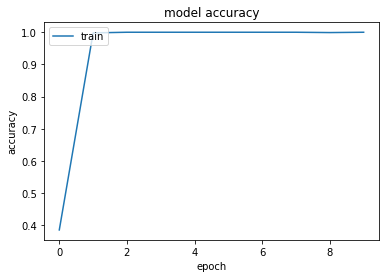

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()